<a href="https://colab.research.google.com/github/ccarpenterg/LearningTensorFlow2.0/blob/master/01_getting_started_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Started with Tensorflow 2: Training a NN on MNIST

This is a small series of notebooks in which I introduce Tensorflow 2, which is the latest release of Google's machine learning framework. If you already know some Python you will be able to play with these examples, and even apply the same models to other datasets.

If you're not familiar with Colab take a look at their [introductory notes](https://colab.research.google.com/notebooks/welcome.ipynb).

### GPUs in Colab

We'll be using the GPU that is provided by Google in Colab, so in order to enable the GPU for this notebook, follow the next steps:

* Navigate to **Edit** → **Notebook settings**
* Open the **Hard accelerator** drop-down menu and select **GPU**

## Image classification with Tensorflow

Let's start by importing some standard functions, importing tensorflow, checking its version and how many GPUs are available if any:

In [1]:
#import print function from future
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
#import TensorFlow and check version
import tensorflow as tf

import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


### MNIST Dataset

In this notebook we are going to work with the MNIST dataset. Basically it contains images of handwritten digits in grayscale, and its corresponding labels (one, two, three, etc).

Downloading and feeding the dataset to the neural network is really simple. The dataset is conveniently included in the keras module:

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

The image values are normalized by dividing them by 255.0, and therefore these values are cast to float numbers between 0.0 and 1.0.

### Visualizing MNIST

We take a look at our MNIST images. MNIST is the "hello world!"" of neural networks, and it's a great dataset for getting started with a library like Tensorflow 2.0:

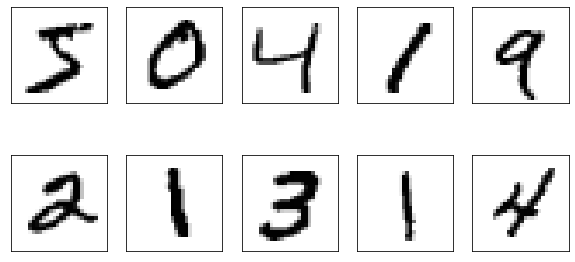

In [3]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

### Building the Model for the Neural Network

So now we are going to train a small neural network. We'll use the MNIST dataset to train our network, and in this case we have a hidden layer of 128 neurons and an output layer of 10 neurons (MNIST: 1, 2, 3, 4, 5, 6, 7, 8, 9, 0 digits).

Also, we are using the Flatten layer as the input layer. The MNIST dataset contains 28x28 images, and we use the Flatten layer to turn those matrices into a 784 (28x28) elements array. Now each hidden layer's neuron is connected to all 784 input layer's neurons.

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Dropout Layer

One of the main issues faced by ML engineers is overfitting. According to Wikipedia, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably".

The process by which we prevent overfitting is called regularization.There are several methods for regularization; Dropout is a regularization technique that randomly drops out neurons during the training process.

In this particular network, we added a Dropout layer between the hidden layer (128 neurons) and the output layer (10 neurons). It has a droput rate of 0.2, which means that each neuron in the hidden layer has a probability of 20% of being dropped out by the network.

### Training Configuration: Optimizer, Loss and Metrics

Now we need to choose the optimizer, the loss function and the metrics we are going to use to train our neural network.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Then we train and evaluate our model:

In [7]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2921 - accuracy: 0.9157
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1430 - accuracy: 0.9573
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1067 - accuracy: 0.9678
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0894 - accuracy: 0.9721
Epoch 5/5
10000/10000 [==============================] - 1s 65us/sample - loss: 0.0790 - accuracy: 0.9764


[0.07895432091394905, 0.9764]

### Results

That's around 97% accuracy on the MNIST for both the training and test dataset. That's really outstanding for a NN with 3 layers (input, hidden and output). The droput is definitely an effective regularization technique.